## I. Data Exploration

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, explained_variance_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [3]:
train = pd.read_csv('./data/train.csv')

print(train.shape)
train.head()

(23518, 190)


,run,crossing_id,EPC,actual,xstat,xmoving,keep_out,max_-12_1,max_-12_2,max_-12_3,...,max_4_allants,max_5_allants,max_6_allants,max_7_allants,max_8_allants,max_9_allants,max_10_allants,max_11_allants,max_12_allants,max_window_Dainaout
0,2023-01-06 16:37:55,18,AD3830770CCDD0AD3830042E,moving,NaN,2.0,2.0,0.0,0.0,0.0,...,0.050119,0.000000,0.000000,0.031623,0.000000,0.000000,0.000000,0.0,0.0,0.174974
1,2023-01-06 17:00:06,10,AD3830770CCDD0AD383002D3,moving,NaN,5.0,5.0,0.0,0.0,0.0,...,0.063096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.162064
2,2023-01-06 16:37:55,2,AD3830770CCDD0AD383002DC,moving,NaN,2.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.199526
3,2023-01-06 16:25:36,19,AD3830770CCDD0AD383004AA,moving,NaN,1.0,1.0,0.0,0.0,0.0,...,0.223872,0.000000,0.281838,0.000000,0.251189,0.281838,0.000000,0.0,0.0,0.512490
4,2023-01-06 17:00:06,15,AD3830770CCDD0AD383002DB,stationary,1.0,5.0,1.0,0.0,0.0,0.0,...,0.000000,0.158489,0.000000,0.158489,0.199526,0.000000,0.158489,0.0,0.0,0.251189


In [4]:
test = pd.read_csv('./data/test.csv')

print(test.shape)
test.head()

(5880, 190)


,run,crossing_id,EPC,actual,xstat,xmoving,keep_out,max_-12_1,max_-12_2,max_-12_3,...,max_4_allants,max_5_allants,max_6_allants,max_7_allants,max_8_allants,max_9_allants,max_10_allants,max_11_allants,max_12_allants,max_window_Dainaout
0,2023-01-06 16:44:34,0,AD3830770CCDD0AD38300284,moving,NaN,3.0,3.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.036767
1,2023-01-06 17:00:06,17,AD3830770CCDD0AD383001C4,stationary,-3.0,5.0,3.0,0.0,0.0,0.0,...,0.000000,0.035481,0.000000,0.035481,0.035481,0.0,0.031623,0.0,0.0,0.039811
2,2023-01-06 16:37:55,2,AD3830770CCDD0AD38300221,moving,NaN,2.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.075774
3,2023-01-06 16:25:36,5,AD3830770CCDD0AD3830029F,moving,NaN,1.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.057502
4,2023-01-06 16:25:36,6,AD3830770CCDD0AD383001D5,stationary,NaN,1.0,1.0,0.0,0.0,0.0,...,0.316228,0.316228,0.281838,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.316228


In [5]:
train['keep_out'].unique()

array([2., 5., 1., 3., 4.])

### Data splitting

In [6]:
Y_train = train['actual']
X_train = train.drop(columns=['run', 'crossing_id', 'EPC', 'actual', 'xstat', 'xmoving', 'keep_out'])

Y_test = test['actual']
X_test = test.drop(columns=['run', 'crossing_id', 'EPC', 'actual', 'xstat', 'xmoving', 'keep_out'])

In [7]:
Y_test.where(Y_test == 'moving').count(), Y_test.where(Y_test == 'stationary').count()

(4014, 1866)

## II. Model selection

### 1. SVC

In [8]:
model = SVC()

model.fit(X_train, Y_train)

Y_pred = model.predict(X_train)

print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

      moving       0.99      0.98      0.99     15986
  stationary       0.96      0.98      0.97      7532

    accuracy                           0.98     23518
   macro avg       0.98      0.98      0.98     23518
weighted avg       0.98      0.98      0.98     23518



In [9]:
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      moving       0.98      0.98      0.98      4014
  stationary       0.96      0.97      0.96      1866

    accuracy                           0.98      5880
   macro avg       0.97      0.97      0.97      5880
weighted avg       0.98      0.98      0.98      5880



### 2. Random Forest

In [10]:
model = RandomForestClassifier(n_jobs=-1)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_train)

print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

      moving       1.00      1.00      1.00     15986
  stationary       1.00      1.00      1.00      7532

    accuracy                           1.00     23518
   macro avg       1.00      1.00      1.00     23518
weighted avg       1.00      1.00      1.00     23518



In [11]:
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      moving       1.00      1.00      1.00      4014
  stationary       0.99      0.99      0.99      1866

    accuracy                           0.99      5880
   macro avg       0.99      0.99      0.99      5880
weighted avg       0.99      0.99      0.99      5880



Optimizing the Random Forest using GridSearch

In [13]:
model = RandomForestClassifier(n_jobs=-1)

params = {
    'n_estimators': [100, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid = GridSearchCV(model, params, n_jobs=-1, cv=5, verbose=2)
grid.fit(X_train, Y_train)

grid.best_score_, grid.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................criterion=gini, n_estimators=100; total time=   2.9s
[CV] END ...................criterion=gini, n_estimators=100; total time=   3.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   3.0s
[CV] END ...................criterion=gini, n_estimators=100; total time=   3.1s
[CV] END ...................criterion=gini, n_estimators=100; total time=   3.0s
[CV] END ...................criterion=gini, n_estimators=500; total time=  16.3s
[CV] END ...................criterion=gini, n_estimators=500; total time=  16.3s
[CV] END ...................criterion=gini, n_estimators=500; total time=  16.6s
[CV] END ...................criterion=gini, n_estimators=500; total time=  15.7s
[CV] END ...................criterion=gini, n_estimators=500; total time=  16.4s
[CV] END ................criterion=entropy, n_estimators=100; total time=   2.8s
[CV] END ................criterion=entropy, n_est

(0.9901353402300745, {'criterion': 'entropy', 'n_estimators': 1000})

Trying out the best parameters

## Evaluation

In [14]:
model = grid.best_estimator_

model.fit(X_train, Y_train)

Y_pred = model.predict(X_train)

print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

      moving       1.00      1.00      1.00     15986
  stationary       1.00      1.00      1.00      7532

    accuracy                           1.00     23518
   macro avg       1.00      1.00      1.00     23518
weighted avg       1.00      1.00      1.00     23518



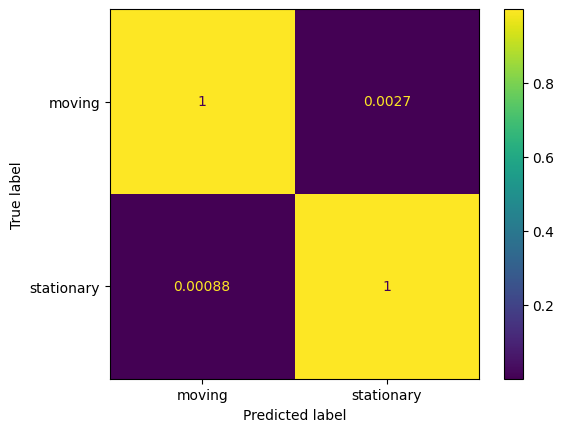

In [20]:
ConfusionMatrixDisplay(confusion_matrix(Y_train, Y_pred, labels=model.classes_, normalize='pred'), display_labels=model.classes_).plot()

In [21]:
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

      moving       1.00      1.00      1.00      4014
  stationary       0.99      0.99      0.99      1866

    accuracy                           0.99      5880
   macro avg       0.99      0.99      0.99      5880
weighted avg       0.99      0.99      0.99      5880



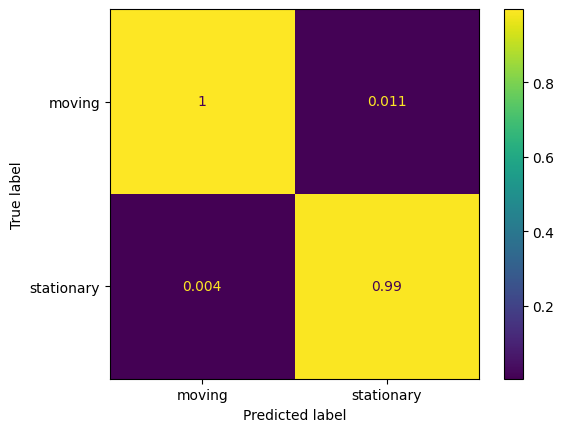

In [22]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred, labels=model.classes_, normalize='pred'), display_labels=model.classes_).plot()

Calculating the explained variance ratio

In [23]:
Y_pred_digits = []
for val in Y_pred:
    if val == 'moving':
        Y_pred_digits.append(1)
    else:
        Y_pred_digits.append(0)

Y_pred[:5], Y_pred_digits[:5]

(array(['moving', 'stationary', 'moving', 'moving', 'stationary'],
       dtype=object),
 [1, 0, 1, 1, 0])

In [24]:
Y_test_digits = []
for val in Y_test:
    if val == 'moving':
        Y_test_digits.append(1)
    else:
        Y_test_digits.append(0)

Y_test[:5], Y_test_digits[:5]

(0        moving
 1    stationary
 2        moving
 3        moving
 4    stationary
 Name: actual, dtype: object,
 [1, 0, 1, 1, 0])

In [25]:
explained_variance_score(Y_test_digits, Y_pred_digits)

0.9717409217791321

ROC

In [26]:
roc_auc_score(Y_test_digits, Y_pred_digits)

0.993221474037012

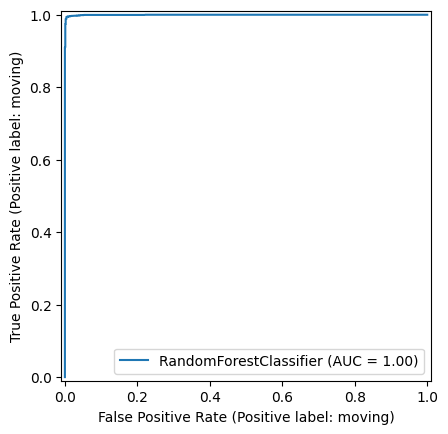

In [27]:
RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, Y_test, pos_label='moving')

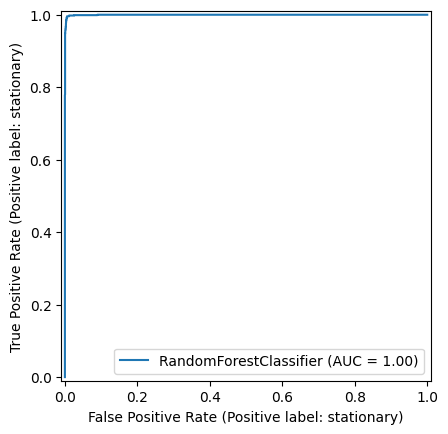

In [28]:
RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, Y_test, pos_label='stationary')

Cross validation

In [29]:
model = grid.best_estimator_

scores = cross_val_score(model, X_train, Y_train, cv=10, n_jobs=-1, verbose=1)

round(scores.mean()*100, 2), round(scores.min()*100, 2), round(scores.max()*100,2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   34.5s remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.5s finished


(99.29, 98.89, 99.53)